In [1]:
import pandas as pd

In [35]:
Advertising = pd.read_csv('Advertising.csv')


In [36]:
Advertising = pd.read_csv('Advertising.csv', index_col='Unnamed: 0')


In [4]:
from matplotlib.pyplot import subplots

In [ ]:
fig, axes = subplots(ncols=3, figsize=(15,4))
Advertising.plot.scatter('TV', 'sales', ax=axes[0])
Advertising.plot.scatter('radio', 'sales', ax=axes[1])
Advertising.plot.scatter('newspaper', 'sales', ax=axes[2]);

In [ ]:
from PIL import Image
img = Image.open('reta.png')
img

#### n é o coeficiente linear (<u>intercepto</u>) é o valor de Y para x = 0.

#### m é a inclinação (<u>coeficiente</u> angular) é aumento médio em y quando o x aumenta de uma unidade.

### <center>Como descobrir o m e o n?</center>
### Queremos encontrar um coeficiente linear (intercepto) e uma inclinação (coeficiente angular)<br><br>tais que a reta resultante esteja o mais próxima possível dos 200 pontos de dados.<br><br>Existem várias maneiras de medir esta proximidade.<br><br>No entanto, de longe, a abordagem mais comum é minimizar a<br><br>soma dos quadrados dos resíduos entre<br><br>os 200 valores observados e os valores previstos pela aproximação linear

In [ ]:
from PIL import Image
img = Image.open('residuos.png')
img

$$
\large \text{resíduo}(X) = (y(X) - \text{predito}(X))^2
$$


# Modelos lineares

In [8]:
from sklearn.linear_model import LinearRegression

## Previsão de vendas baseada apenas no investimento em TV

In [9]:
modelo_tv = LinearRegression()

In [10]:
Xtv = Advertising['TV']
ytv = Advertising['sales']

In [11]:
#modelo_tv.fit(Xtv,ytv)

Erro na chamada do método fit(): 
    
    Expected 2D array, got 1D array instead

Para corrigir:
    
    Reshape your data either 
    using array.reshape(-1, 1) if your data has a single feature or 
    array.reshape(1, -1) if it contains a single sample.

reshape(-1, 1): primeiro argumento calcula o número de linhas necessário para que<br>
o array resultante tenha uma única coluna. O segundo argumento, 1, indica que o array resultante tem que ter uma coluna.

reshape(1, -1): O primeiro argumento indica que o array resultante tem que ter uma única linha. O segundo argumento calcula o número de colunas necessário para que o array resultante tenha uma única linha.

**O reshape é necessário por causa da assinatura do método fit, cujo primeiro parâmetro (o X) é um array de dimensão (n_samples, n_features). Não pode ser um array unidimensional (o nosso vetor de algoritmos). O y costuma ser unidimensional, mas pode ser multimensional.**

In [12]:
print(Xtv.shape, "      ", Xtv.values.reshape(-1,1).shape, "     ", ytv.shape)

(200,)        (200, 1)       (200,)


In [13]:
type(Xtv), type(ytv)

(pandas.core.series.Series, pandas.core.series.Series)

**Se Xtv fosse do tipo array numpy em vez de ser do tipo Series, não precisaria do .values**

In [14]:
modelo_tv.fit(Xtv.values.reshape(-1,1),ytv)

LinearRegression()

In [15]:
Atv = modelo_tv.coef_
Btv = modelo_tv.intercept_
Atv, Btv

(array([0.04753664]), 7.032593549127694)

In [16]:
type(Atv), type(Btv) 

(numpy.ndarray, numpy.float64)

In [17]:
Atv.shape, Btv.shape

((1,), ())

**O coef_ é um array multidimensional! O intercept é número simples (um escalar)**

## O que significa o valor de coef_ (inclinação) 0.04753664?

###  a inclinação descreve a taxa de mudança: a inclinação representa o quanto a variável dependente (eixo y) muda em resposta a uma mudança <u>unitária</u> na variável independente (eixo x). A inclinação é uma medida de uma razão, não de ângulo.

## De acordo com este modelo, um aumento de 1000 dólares em gastos com propaganda na TV leva à venda de, aproximadamente, 50 unidades a mais.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

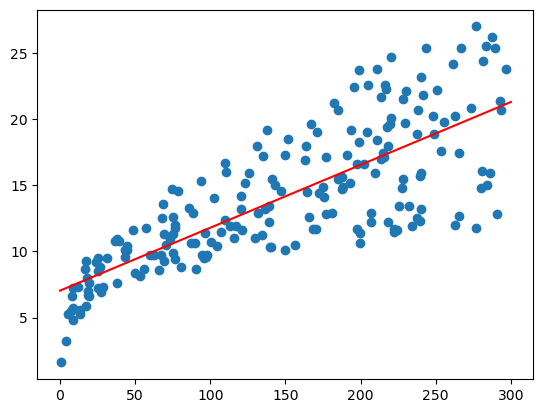

In [19]:
X = np.linspace(0,300)  

y = Atv*X + Btv
plt.plot(X, y, c="red") # sciKit

plt.scatter(Advertising['TV'],Advertising['sales']);  # dados observados

In [20]:
modelo_tv.score(Xtv.values.reshape(-1,1),ytv)

0.611875050850071

## Previsão de vendas baseada apenas no investimento em radio

In [21]:
modelo_radio = LinearRegression()

Xradio = Advertising['radio']
yradio = Advertising['sales']

modelo_radio.fit(Xradio.values.reshape(-1,1),yradio)

Aradio = modelo_radio.coef_
Bradio = modelo_radio.intercept_
Aradio,Bradio

(array([0.20249578]), 9.311638095158283)

In [22]:
modelo_radio.score(Xradio.values.reshape(-1,1),yradio)

0.33203245544529525

## Previsão de vendas baseada apenas no investimento em news

In [23]:
modelo_news = LinearRegression()

Xnews = Advertising['newspaper']
ynews = Advertising['sales']

modelo_news.fit(Xnews.values.reshape(-1,1),ynews)

Anews = modelo_news.coef_
Bnews = modelo_news.intercept_
Anews,Bnews

(array([0.0546931]), 12.351407069278162)

In [24]:
modelo_news.score(Xnews.values.reshape(-1,1),ynews)

0.05212044544430516

||TV|radio|jornal|
|----|------|------|------|
|coef|0.0475|0.203|0.055|
|intercept|7.03|9.31|12.35|
|score|0.61|0.33|0.052|

>>TV: cada 1000 dólares em propaganda aumentam as vendas em 47,5 unidades<br>
>>radio: cada 1000 dólares em propaganda aumentam as vendas em 203 unidades<br>
>>newsp: cada 1000 dólares em propaganda aumentam as vendas em 55 unidades

### Cada uma das três equações de regressão ignora as outras duas mídias ao formar estimativas para os coeficientes de regressão. 

### Se os orçamentos de publicidade estão correlacionados entre si nos 200 mercados consumidores em nosso conjunto de dados, isso pode levar a estimativas muito enganosas da associação entre cada orçamento de mídia e as vendas.

# <center> Multiple Linear Regression</center>



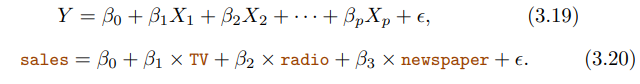

## Previsão de vendas baseada apenas no investimento em TV e radio

In [25]:
modelo_tvRadio = LinearRegression()

XtvRadio = Advertising[['TV', 'radio']]
ytvRadio = Advertising['sales']

print(XtvRadio.shape, ytvRadio.shape)

# treinamento
modelo_tvRadio.fit(XtvRadio,ytvRadio)

AtvRadio = modelo_tvRadio.coef_
BtvRadio = modelo_tvRadio.intercept_

(200, 2) (200,)


In [26]:
print(Atv[0],Aradio[0])
print(AtvRadio[0],AtvRadio[1])
print()
print(Btv)
print(Bradio)
print(BtvRadio)

0.04753664043301976 0.20249578339243965
0.04575481510107615 0.1879942266203092

7.032593549127694
9.311638095158283
2.9210999124051362


## Previsão de vendas baseada apenas no investimento em TV e news

In [27]:
modelo_tvNews = LinearRegression()

XtvNews = Advertising[['TV', 'newspaper']]
ytvNews = Advertising['sales']

print(XtvNews.shape, ytvNews.shape)

# treinamento
modelo_tvNews.fit(XtvNews,ytvNews)

AtvNews = modelo_tvNews.coef_
BtvNews = modelo_tvNews.intercept_

(200, 2) (200,)


In [28]:
print(Atv[0],Anews[0])
print(AtvNews[0],AtvNews[1])
print()
print(Btv)
print(Bnews)
print(BtvNews)

0.04753664043301976 0.05469309847227335
0.04690121389190708 0.04421942424519282

7.032593549127694
12.351407069278162
5.774947967911633


## Previsão de vendas baseada no investimento em TV, radio e news

In [29]:
modelo_tvRadioNews = LinearRegression()

X = Advertising[['TV', 'radio', 'newspaper']]
y = Advertising['sales']

modelo_tvRadioNews.fit(X,y)

AtvRadioNews = modelo_tvRadioNews.coef_
BtvRadioNews = modelo_tvRadioNews.intercept_

In [30]:
print(Atv[0],Aradio[0],Anews[0])
print(AtvRadioNews[0],AtvRadioNews[1], AtvRadioNews[2])
print()
print(Btv,Bradio,Bnews)
print(BtvRadioNews)

0.04753664043301976 0.20249578339243965 0.05469309847227335
0.04576464545539761 0.18853001691820456 -0.00103749304247632

7.032593549127694 9.311638095158283 12.351407069278162
2.9388893694594085


In [31]:
print('TV   ', modelo_tv.score(Xtv.values.reshape(-1,1),ytv))
print('Radio',modelo_radio.score(Xradio.values.reshape(-1,1),yradio))
print('News ',modelo_news.score(Xnews.values.reshape(-1,1),ynews))
print()
print('TV e radio      ',modelo_tvRadio.score(XtvRadio,ytvRadio))
print()
print('TV e news       ',modelo_tvNews.score(XtvNews,ytvNews))
print()
print('TV, radio e news', modelo_tvRadioNews.score(X,y))

TV    0.611875050850071
Radio 0.33203245544529525
News  0.05212044544430516

TV e radio       0.8971942610828957

TV e news        0.6458354938293273

TV, radio e news 0.8972106381789522


## A regressão linear múltipla mostra que a propaganda em jornais não está associada com as vendas

James pg 83
Hence, in a simple linear regression which only examines sales versus
newspaper, we will observe that higher values of newspaper tend to be
associated with higher values of sales, even though newspaper 
advertising is not directly associated with sales. 
So newspaper advertising is a surrogate for radio advertising; 
newspaper gets “credit” for the association between radio on sales

Assim, numa regressão linear simples que examina apenas 
vendas versus jornais, observaremos que valores mais elevados 
de jornais tendem a estar associados a valores mais elevados 
de vendas, embora a publicidade em jornais não esteja diretamente 
associada às vendas. Portanto, a publicidade nos jornais é um 
substituto da publicidade no rádio; jornal recebe “crédito” 
pela associação entre rádio em vendas.



This slightly counterintuitive result is very common in many real life
situations. Consider an absurd example to illustrate the point. Running
a regression of shark attacks versus ice cream sales for data collected at
a given beach community over a period of time would show a positive
relationship, similar to that seen between sales and newspaper. Of course
no one has (yet) suggested that ice creams should be banned at beaches
to reduce shark attacks. In reality, higher temperatures cause more people
to visit the beach, which in turn results in more ice cream sales and more
shark attacks. A multiple regression of shark attacks onto ice cream sales
and temperature reveals that, as intuition implies, ice cream sales is no
longer a signifcant predictor after adjusting for temperature.


Este resultado ligeiramente contra-intuitivo é muito comum 
em muitas situações da vida real.

Considere um exemplo absurdo para ilustrar o ponto.

Uma regressão de ataques de tubarões versus vendas 
de sorvete para dados coletados em uma determinada comunidade 
de praia durante um período de tempo mostraria uma relação 
positiva, semelhante à observada entre vendas e jornais.

É claro que ninguém (ainda) sugeriu que os sorvetes 
deveriam ser proibidos nas praias para reduzir os 
ataques de tubarões.

Na realidade, as temperaturas mais elevadas fazem com que 
mais pessoas visitem a praia, o que por sua vez resulta 
em mais vendas de sorvetes e mais ataques de tubarões.

Uma regressão múltipla de ataques de tubarão usando 
vendas de sorvete e temperatura revela que, como a 
intuição indica, as vendas de sorvete não são mais 
um preditor significativo após a retificação pela temperatura.

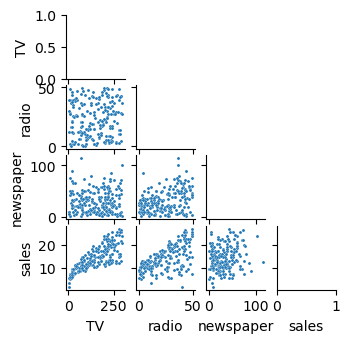

In [32]:
import seaborn as sns

g = sns.PairGrid(Advertising, corner=True)

g.map_lower(sns.scatterplot, s=5);

g.fig.set_size_inches(3, 3)

# Matriz de correlação

In [33]:
Advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# corrwith

In [34]:
Advertising.corrwith(Advertising['sales'])

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
dtype: float64